<a href="https://colab.research.google.com/github/Yuvarajuu/heart-d-prediction/blob/main/heart_d_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [7]:
df = pd.read_csv("/content/heart-disease.csv")

In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<Axes: xlabel='target'>

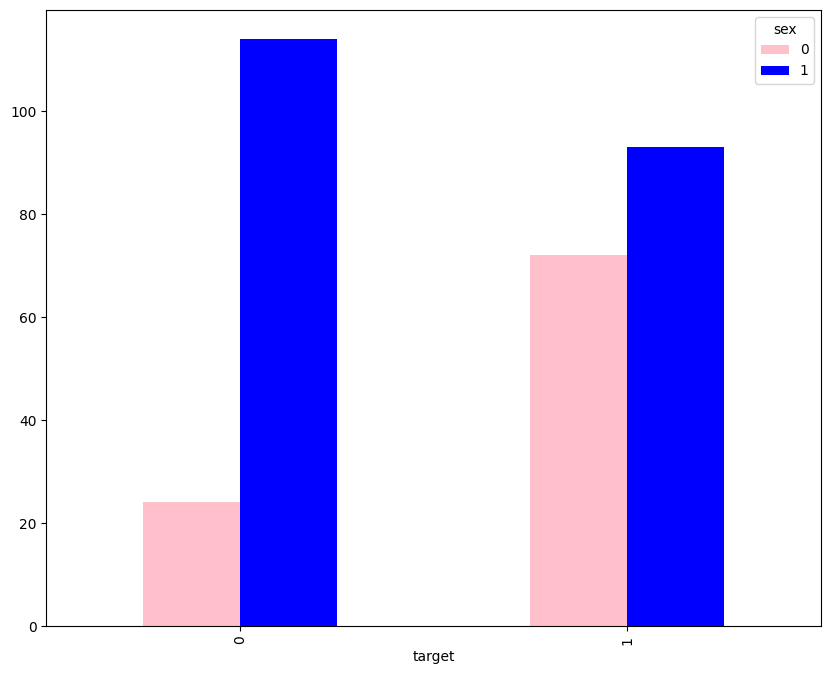

In [79]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize = (10,8), color=["pink", "blue"])

In [57]:
k=df[df['sex']>0]
k.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


# New Section

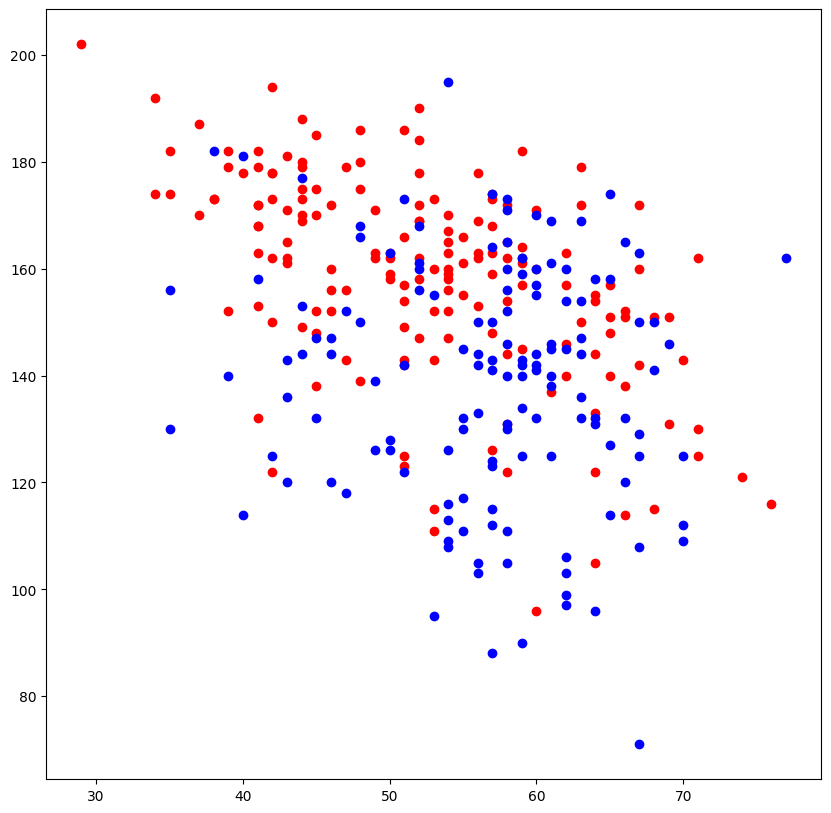

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="blue")
plt.show()

In [12]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
x = df.drop("target", axis = 1)
y = df["target"]

In [14]:
x.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train,y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 252   62    0   0       138   294    1        1      106      0      1.9   
 171   48    1   1       110   229    0        1      168      0      1.0   
 176   60    1   0       117   230    1        1      160      1      1.4   
 52    62    1   2       130   231    0        1      146      0      1.8   
 82    60    0   2       102   318    0        1      160      0      0.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 71    51    1   2        94   227    0        1      154      1      0.0   
 177   64    1   2       140   335    0        1      158      0      0.0   
 263   63    0   0       108   269    0        1      169      1      1.8   
 96    62    0   0       140   394    0        0      157      0      1.2   
 146   44    0   2       118   242    0        1      149      0      0.3   
 
      slope  ca  thal  
 252      1   3     2  
 171      0   0     3  
 1

In [17]:
model=RandomForestClassifier()

In [18]:
model

RandomForestClassifier()

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
a=model.predict(x_test)

In [21]:
a

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [22]:
model.score(x_test,y_test)

0.7868852459016393

In [23]:
accuracy_score(a, y_test)

0.7868852459016393

In [24]:
precision_score(a, y_test)

0.8571428571428571

In [25]:
recall_score(a,y_test)

0.8372093023255814

In [26]:
grid={'n_estimators':[100,200,300],
      'max_depth':[10,20,30],
      'min_samples_split':[2,5,10]}

In [27]:
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5)

In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [29]:
grid_search.score(x_test,y_test)

0.819672131147541

In [30]:
pred=grid_search.predict(x_test)

In [31]:
grid_search.predict_proba(x_test)

array([[0.17      , 0.83      ],
       [0.02611111, 0.97388889],
       [0.41666667, 0.58333333],
       [0.4       , 0.6       ],
       [0.02      , 0.98      ],
       [0.01464052, 0.98535948],
       [0.14944444, 0.85055556],
       [0.23566667, 0.76433333],
       [0.95      , 0.05      ],
       [0.16388889, 0.83611111],
       [0.91222222, 0.08777778],
       [0.58946581, 0.41053419],
       [0.347     , 0.653     ],
       [0.01      , 0.99      ],
       [0.46083333, 0.53916667],
       [0.15666667, 0.84333333],
       [0.255     , 0.745     ],
       [0.21333333, 0.78666667],
       [0.94      , 0.06      ],
       [0.3587037 , 0.6412963 ],
       [0.31644444, 0.68355556],
       [0.94333333, 0.05666667],
       [0.5274183 , 0.4725817 ],
       [0.6325    , 0.3675    ],
       [0.10666667, 0.89333333],
       [0.27239286, 0.72760714],
       [0.93333333, 0.06666667],
       [0.43177778, 0.56822222],
       [0.5475    , 0.4525    ],
       [0.25770931, 0.74229069],
       [0.

In [43]:
with open('rf.pkl','wb') as f:
    pickle.dump(model, f)